## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "momiji"
hashtag = "紅葉"
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [3]:
start = "2022-11-22T12:00+09:00"
end = "2022-11-22T23:59+09:00"
timespan = "22-22"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

In [4]:
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=10')
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
print(f"tau = {tau}")

tau = 66


In [5]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/momiji/original/紅葉_22-22_66_aam


In [6]:
tb.check_degree(G)

singleton:[]


,degree
紅葉,13725
秋,3192
紅葉狩り,2150
写真好きな人と繋がりたい,2010
autumn,1991
...,...
北海道大学,1
東京江戸たてもの園,1
静寂の中で,1
風車,1


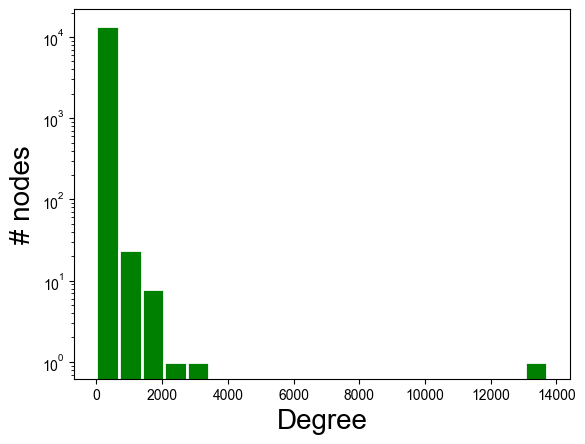

In [7]:
tb.plot_dd(G, 20)

In [8]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.393079161821478, 
its standard error sigma: 0.0389529652734875, 
k_min: 55.0


(2.393079161821478, 0.0389529652734875, 55.0)

In [9]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 0.0002528066314321339.


In [10]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.5333585549544735.


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.393079161821478, 
its standard error sigma: 0.0389529652734875, 
k_min: 55.0


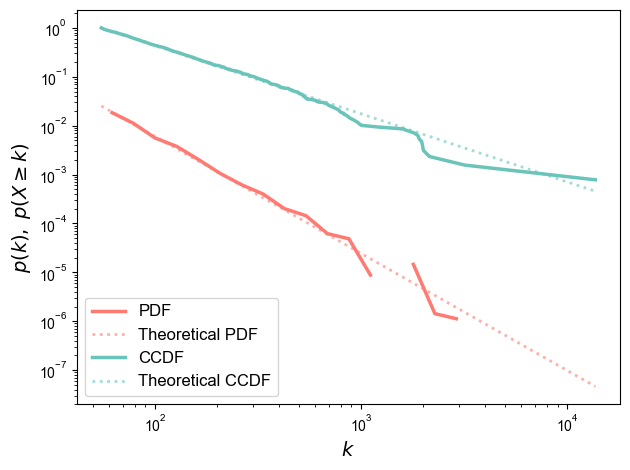

In [11]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")